In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Python Version**

In [2]:
!python --version

Python 3.10.13


# **GPU Checking**

In [3]:
!nvidia-smi

Sun Feb 18 12:32:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print(f"GPU: {device}")
else:
    print("No GPU available.")

GPU: Tesla P100-PCIE-16GB


# **Importing Dependancies**

In [5]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.1/8062.4 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
import torch
print(torch.version.cuda)
torch.cuda.is_available()

12.1


True

# **Train**

In [8]:
!yolo task=segment mode=train model=/kaggle/input/segmentation-model/yolov8s-seg.pt data=/kaggle/input/fydp-yolov8-augmented-yaml/data.yaml epochs=150 imgsz=640 batch=16

Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
yolo/engine/trainer: task=segment, mode=train, model=/kaggle/input/segmentation-model/yolov8s-seg.pt, data=/kaggle/input/fydp-yolov8-augmented-yaml/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Train Result/Epoch**

In [ ]:
from tabulate import tabulate
import csv

csv_file_path = '/kaggle/working/runs/segment/train/results.csv'

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    data = list(csv_reader)

print(tabulate(data, headers=header, tablefmt='grid'))

# **Result Graph**

In [ ]:
from IPython.display import display, Image

Image(filename="/kaggle/working/runs/segment/train/results.png", width=600)

# **Confusion Matrics**

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/confusion_matrix.png", width=600)

# **F1 Score Curve**

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/BoxF1_curve.png", width=600)

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/MaskF1_curve.png", width=600)

# **Precision Curve**

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/MaskP_curve.png", width=600)

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/BoxP_curve.png", width=600)

# **Recall Curve**

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/BoxR_curve.png", width=600)

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/MaskR_curve.png", width=600)

# **Precision-Recall Curve**

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/BoxPR_curve.png", width=600)

In [ ]:
Image(filename="/kaggle/working/runs/segment/train/MaskPR_curve.png", width=600)

# **Validate Trained Model**

In [8]:
!yolo  task=segment  mode=val  save_txt=True  model=/kaggle/input/trained-model/best.pt  data=/kaggle/input/fydp-yolov8-augmented-yaml/data.yaml  conf=0.5  source="/kaggle/input/fydp-yolov8-augmented/FYDP_Yolov8_Augmented/test/images"

2024-02-18 12:35:02.253325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 12:35:02.253417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 12:35:02.378089: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782696 parameters, 0 gradients, 42.5 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 22.4MB/s]
val: Scanning /kaggle/input/fydp-yolov8-augmented/FYDP_Yolov8_Augmented/valid/la
val: WARNING ⚠️ Cache d

# **Inference using Trained Model**

In [9]:
!yolo  task=segment  mode=predict  save_txt=True  model=/kaggle/input/trained-model/best.pt  conf=0.5  source="/kaggle/input/fydp-yolov8-augmented/FYDP_Yolov8_Augmented/test/images"

2024-02-18 12:36:36.278691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 12:36:36.278748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 12:36:36.280304: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782696 parameters, 0 gradients, 42.5 GFLOPs

image 1/670 /kaggle/input/fydp-yolov8-augmented/FYDP_Yolov8_Augmented/test/images/0a08c243-e357-4dcf-90bc-296cf1a1fe32_png.rf.719527b4e3cb452db4ad13137bb3785d.jpg: 640x640 1 image, 1 p

# **Making Zip & Download Prediction**

In [10]:
import shutil
import zipfile

source_folder = '/kaggle/working/runs'
zip_filename = '/kaggle/working/runs'
shutil.make_archive(zip_filename, 'zip', source_folder)

'/kaggle/working/runs.zip'

# **Sample Test Images**

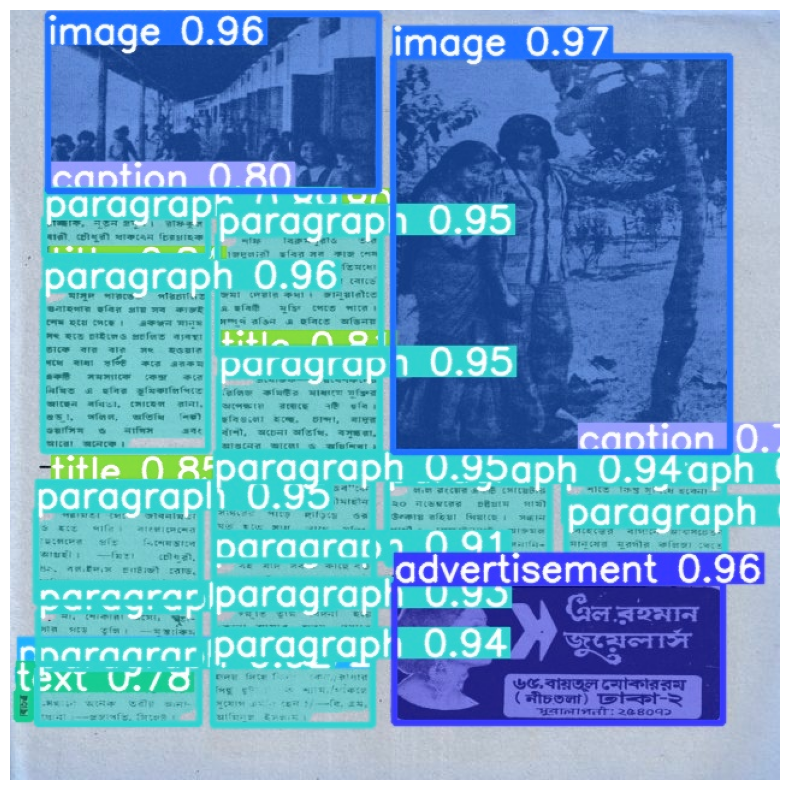

In [13]:
import cv2 
import matplotlib.pyplot as plt 
import matplotlib.image as img

image = cv2.imread('/kaggle/working/runs/segment/predict/afa6d55c-9aaa-4b0d-b764-c71145bd83c7-at800_jpg.rf.e322a4a0e806d30ad968cdd1918c7a54.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

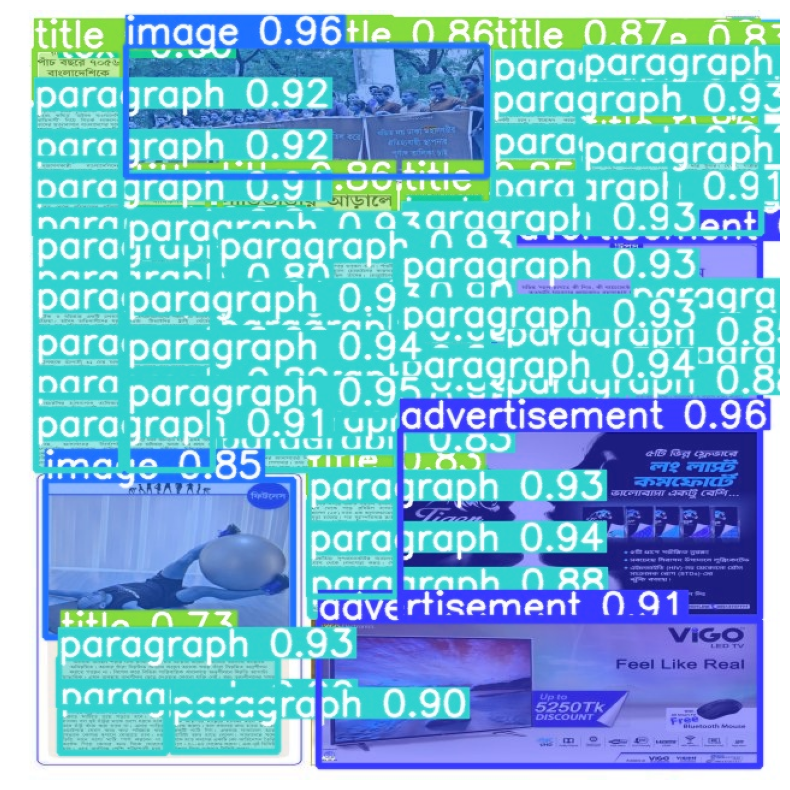

In [14]:
image = cv2.imread('/kaggle/working/runs/segment/predict/6af61d39-5d14-4517-baab-43698784c824_jpg.rf.c8c6fa886cd43b4d78a5b85924319318.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

# **Working Directory Cleaner(If needed)**

In [ ]:
#!rm -rf /kaggle/working/*

# **Ground_truth and Prediction directories**

In [15]:
ground_truth_dir = "/kaggle/input/fydp-yolov8-augmented/FYDP_Yolov8_Augmented/test/labels"
prediction_dir = "/kaggle/working/runs/segment/predict/labels"

# **Define class names**

In [17]:
class_names = {0: 'advertisement', 1: 'caption', 2: 'image', 3: 'page number', 4: 'paragraph', 5: 'table', 6: 'text', 7: 'title'}

# **Parsing information from lebel data**

In [18]:
def parse_data_from_txt(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data = []
        for line in lines:
            line = line.strip().split()
            class_id = int(line[0])
            coordinates = [float(coord) for coord in line[1:]]
            data.append((class_id, coordinates))
        return data

# **Accuracy = (2 X Area of Overlap) / Total Area**

In [19]:
def calculate_accuracy(ground_truth, prediction):
    overlap_area = {class_id: 0 for class_id in class_names}
    total_area_ground_truth = {class_id: 0 for class_id in class_names}
    total_area_prediction = {class_id: 0 for class_id in class_names}
    
    for gt_item, pred_item in zip(ground_truth, prediction):
        class_id = gt_item[0]
        gt_coordinates = gt_item[1]
        gt_polygon = [(gt_coordinates[i], gt_coordinates[i+1]) for i in range(0, len(gt_coordinates), 2)]
        
        pred_coordinates = pred_item[1]
        pred_polygon = [(pred_coordinates[i], pred_coordinates[i+1]) for i in range(0, len(pred_coordinates), 2)]
        
        # Skip if prediction polygon is empty
        if not pred_polygon:
            continue
        
        # Calculate overlap area
        overlap = 0
        for i in range(len(gt_polygon)):
            overlap += min(gt_polygon[i][0], pred_polygon[i][0]) * min(gt_polygon[i][1], pred_polygon[i][1])
        overlap_area[class_id] += overlap
        
        # Calculate total area for ground truth
        gt_x_min = min(gt_coordinates[::2])
        gt_x_max = max(gt_coordinates[::2])
        gt_y_min = min(gt_coordinates[1::2])
        gt_y_max = max(gt_coordinates[1::2])
        total_area_ground_truth[class_id] += (gt_x_max - gt_x_min) * (gt_y_max - gt_y_min)
        
        # Calculate total area for prediction
        pred_x_min = min(pred_coordinates[::2])
        pred_x_max = max(pred_coordinates[::2])
        pred_y_min = min(pred_coordinates[1::2])
        pred_y_max = max(pred_coordinates[1::2])
        total_area_prediction[class_id] += (pred_x_max - pred_x_min) * (pred_y_max - pred_y_min)
    
    class_accuracies = {}
    for class_id in class_names:
        # Calculate accuracy as the ratio of overlap area to total area of ground truth
        if total_area_ground_truth[class_id] != 0:
            accuracy = (2 * overlap_area[class_id]) / (total_area_ground_truth[class_id] + total_area_prediction[class_id]) * 100
            class_accuracies[class_id] = min(accuracy, 100)  # Limit accuracy to 100
        else:
            class_accuracies[class_id] = 0
    
    # Calculate overall accuracy
    overall_accuracy = sum(class_accuracies.values()) / len(class_names)
    overall_accuracy = min(overall_accuracy, 100)  # Limit overall accuracy to 100
    
    return class_accuracies, overall_accuracy

# **Dictionaries to store accuracies**

In [20]:
class_accuracies = {}
overall_accuracy = 0

# **Iterate over files to calculate Accuracy**

In [ ]:
for filename in os.listdir(ground_truth_dir):
    ground_truth_path = os.path.join(ground_truth_dir, filename)
    prediction_path = os.path.join(prediction_dir, filename)
    
    # Parse ground truth and prediction data
    ground_truth_data = parse_data_from_txt(ground_truth_path)
    prediction_data = parse_data_from_txt(prediction_path)
    
    # Calculate accuracy for the current image
    image_class_accuracies, image_overall_accuracy = calculate_accuracy(ground_truth_data, prediction_data)
    
    # Update class-wise accuracies and overall accuracy
    for class_id, accuracy in image_class_accuracies.items():
        class_accuracies[class_id] = class_accuracies.get(class_id, 0) + accuracy
    overall_accuracy += image_overall_accuracy

# **Normalize class-wise accuracies by the number of images**

In [22]:
num_images = len(os.listdir(ground_truth_dir))
class_accuracies = {class_id: accuracy / num_images for class_id, accuracy in class_accuracies.items()}
overall_accuracy /= num_images

# **Class-wise Accuracies**

In [23]:
# Print class-wise accuracies in a table
print("Class\t\tAccuracy")
for class_id, accuracy in class_accuracies.items():
    print(f"{class_names[class_id]:<15}{accuracy:.2f}")

Class		Accuracy


# **Overall or Average Accuracy**

In [24]:
print(f"\nOverall Accuracy: {overall_accuracy:.2f}")


Overall Accuracy: 0.00
